<a href="https://colab.research.google.com/github/tasyasvdh09/PCVK_Genap_2023/blob/main/PCVK_Modul_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASYA SEVIA ADHA / TI3D / 17 / 2041720031

In [8]:
#import folder yang ada di drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import cv2

1.) Program implementasi operasi dilasi Structuring Element Dilasi (SED) 
berbentuk cross 3x3 tanpa dan dengan menggunakan library morphology dari openCV

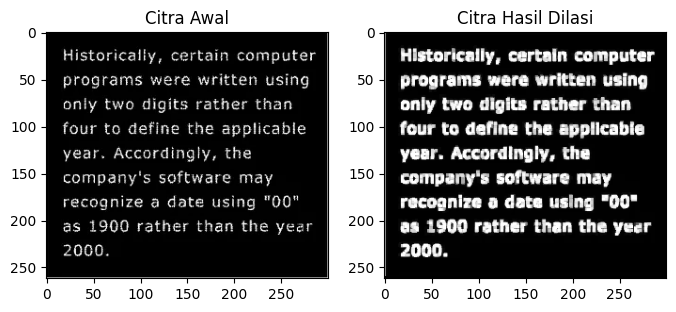

In [67]:
#Tanpa library morphology dari opencv

input_image = cv2.imread('/content/drive/MyDrive/PCVK/images/morphology.png')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

se = np.ones((3,3))

def morph_dilate(img, kernel):
    rows = img.shape[0]     
    cols = img.shape[1]
    dilate_img=np.zeros((rows,cols))

    newimg=np.zeros((img.shape[0]+2,img.shape[1]+2))
    newimg[1:-1,1:-1]=img
    for x in range(0,rows-(kernel.shape[0]-1)):
        for y in range(0,cols-kernel.shape[0]-1):
            dilate_img[x,y]=np.max(se * newimg[x:x+kernel.shape[0],y:y+kernel.shape[0]])
    return dilate_img

output_image = morph_dilate(input_image, se)

fig, axs = plt.subplots(1, 2, figsize=(8,4))

axs[0].set_title("Citra Awal")
axs[0].imshow(input_image, cmap='gray')

axs[1].set_title("Citra Hasil Dilasi")
axs[1].imshow(output_image, cmap='gray')

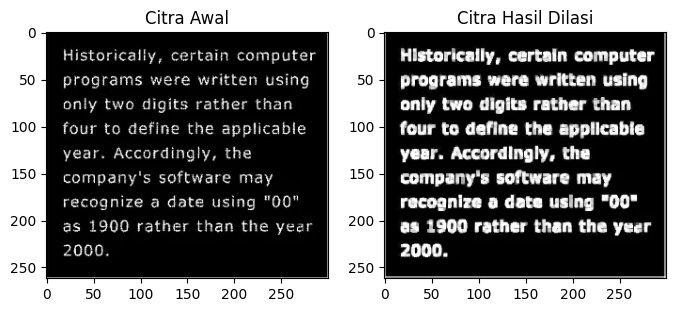

In [68]:
#Menggunakan library morphology dari opencv

input_image = cv2.imread('/content/drive/MyDrive/PCVK/images/morphology.png')

se = np.ones((3,3))

output_image = cv2.morphologyEx(input_image, cv2.MORPH_DILATE, se)

fig, axs = plt.subplots(1, 2, figsize=(8,4))

axs[0].set_title("Citra Awal")
axs[0].imshow(input_image)

axs[1].set_title("Citra Hasil Dilasi")
axs[1].imshow(output_image)

2.) program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk 
square 5x5 dapat dengan menggunakan library morphology dari openCV

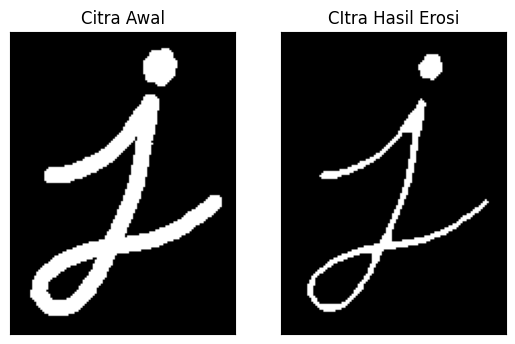

In [69]:
#menggunakan library morphology dari opencv

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/PCVK/images/j.png')

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('CItra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

4.) Program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk 
square 5x5 tanpa dan dengan menggunakan library morphology dari openCV

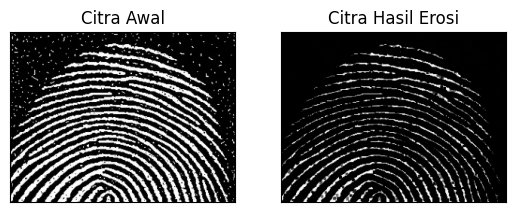

In [57]:
#menggunakan library morphology dari opencv
img = cv2.imread('/content/drive/MyDrive/PCVK/images/fingerprint.png')

kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])

plt.show()

5.) Program implementasi operasi opening dengan Structuring Element berbentuk square 3x3 tanpa dan dengan menggunakan library morphology dari openCV

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/images/fingerprint.png')

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

6.) Program implementasi operasi closing dengan Structuring Element berbentuk 
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

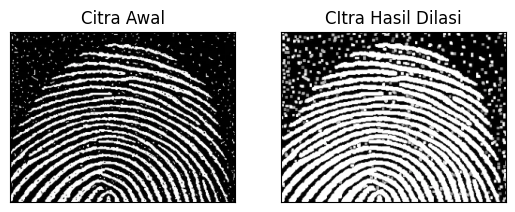

In [58]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('/content/drive/MyDrive/PCVK/images/fingerprint.png')
 
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
 
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilation),plt.title('CItra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()